# Introducción al Análisis de Marketing

## Importancia
- Conocimiento cliente
- ROI
- Personalización de experiencias
- Efectividad de la campaña

## Términos clave
- Funnel de conversión
- Segmentación de mercado
- Customer Liftime Value (CLV)
- Retención y Churn

## Ejemplos
- Presonalización de campañas
- Optimizar los presupuestos publicitarios
- Efectividad de las campañas



# Métricas clave de marketing
## 1. KPIS's de Adquisición (Enfocados a atraer nuevos clientes)

### CAC (Costo de adquisición del cliente)
CAC = Total invertido en marketing y ventas / Número de nuevos clientes adquiridos

### CTR (Clicks por impresión)
CTR (%)= (Clicks en el anuncio/Impresiones totales)*100

### CPC (Costo por click)
CPC = Costot toal de la campaña / Número de clicks

## 2. KPIS's de Conversión (Miden el rendimiento de las ventas y acciones clave)

### Tasa de conversión
Tasa de conversión (%)= (Número de conversiones/Número de visitantes únicos)*100

### ROAS (Rentabilidad de la inversión en publicidad)
ROAS = Ingresos generados por la campaña/Inversión publicitaria

## 3. KPI's de Retención (Analizan el comportamiento de los clientes YA existentes)

### Tasa de churn (Abandono)
Tasa de churn (%)= (Número de clientes perdidos en un período/Número total de clientes al inicio de período)*100

### Tasa de Retención (Mantener al cliente)
Tasa de retención (%)= 100 - Tasa de Churn(%)

### CLV (Valor que genera el cliente)
CLV = (Ingreso Promedio por Compra * Frecuencia de Compra * Duración del CLiente) * Margen de Beneficio




In [32]:
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x : '%.4f' % x)

In [3]:
df = pd.read_csv('../data/data_limpios.csv')

In [4]:
df.columns

Index(['job', 'marital', 'education', 'housing', 'loan', 'contact', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'latitude', 'longitude', 'id_', 'date_dt', 'year', 'month', 'day',
       'quarter', 'age_iterative', 'default_iterative'],
      dtype='object')

### Métricas a generar
- Tasa de conversión
- Tasa de rechazo
- Tasa de éxito por campaña
- Duración media de llamada
- Contactos promedio por cliente
- Tiempo promedio desde último contacto
- Tasa de conversión por segmento
- Conversión por tipo de contacto
- Conversión por préstamo/hipoteca
- Ratio de eficiencia por duración
- Conversión por mes/año
- Evolución temporal
- Correlación con la variable objetivo


In [57]:
df['conversion_rate'] = (df['y'].value_counts(normalize=True)['yes']) * 100
df['rejection_rate'] = (df['y'].value_counts(normalize=True)['no']) * 100
df['campaign_success'] = df[df['y']=='yes']['campaign'].count() / df['campaign'].sum()
df['dfavg_duration'] = df['duration'].mean()
df['avg_contacts'] = df['campaign'].mean()
df['avg_pdays'] = df[df['pdays'] > 0]['pdays'].mean()
print(df[['conversion_rate', 'rejection_rate', 'campaign_success', 'dfavg_duration', 'avg_contacts', 'avg_pdays']].iloc[0])

conversion_rate     11.2651
rejection_rate      88.7349
campaign_success     0.0456
dfavg_duration     255.9945
avg_contacts         2.4714
avg_pdays          999.0000
Name: 0, dtype: float64


In [49]:
#Tasa de conversión por profesión (Ver qué grupos responden mejor)
df.groupby('job')['y'].value_counts(normalize=True).unstack()['yes'] * 100


job
admin.          13.0139
blue-collar      6.8883
entrepreneur     8.2786
housemaid        9.8842
management      11.2131
retired         25.1955
self-employed   10.8126
services         8.0730
student         31.3400
technician      10.8454
unemployed      14.3932
unknown         11.3043
Name: yes, dtype: float64

In [51]:
#Tasa de conversión por estado civil (Ver qué grupos responden mejor)
df.groupby('marital')['y'].value_counts(normalize=True).unstack()['yes'] * 100


marital
divorced   10.1850
married    10.2119
single     13.9281
unknown    15.2941
Name: yes, dtype: float64

In [52]:
#Tasa de conversión por nivel educativo (Ver qué grupos responden mejor)
df.groupby('education')['y'].value_counts(normalize=True).unstack()['yes'] * 100


education
basic.4y              10.2847
basic.6y               8.1308
basic.9y               7.8142
high.school           10.8413
illiterate            22.2222
professional.course   11.3201
university.degree     13.7400
unknown               14.4438
Name: yes, dtype: float64

In [55]:
#Conversión por tipo de contacto (Qué canal es más efectivo)
df.groupby('contact')['y'].value_counts(normalize=True).unstack()['yes'] * 100

contact
cellular    14.7430
telephone    5.1589
Name: yes, dtype: float64

In [54]:
#Conversión por préstamo
df.groupby('loan')['y'].value_counts(normalize=True).unstack()['yes'] * 100

loan
0.0000   11.3277
1.0000   10.9155
Name: yes, dtype: float64

In [ ]:
#Ratio de eficiencia por duración (Mide si llamadas más cortas o más largas son más efectivas)
df.groupby('y')['duration'].mean()

y
no    219.4167
yes   544.1162
Name: duration, dtype: float64

In [ ]:
#Conversión por mes (Mide cuándo las campañas son más efectivas)
df.groupby('month')['y'].value_counts(normalize=True).unstack()['yes'] * 100

month
1.0000    11.6008
2.0000    11.1266
3.0000    10.7272
4.0000    11.1949
5.0000    10.6287
6.0000    11.3341
7.0000    11.5335
8.0000    11.4577
9.0000    10.2550
10.0000   12.3645
11.0000   11.4904
12.0000   11.4465
Name: yes, dtype: float64

<Axes: xlabel='month', ylabel='y'>

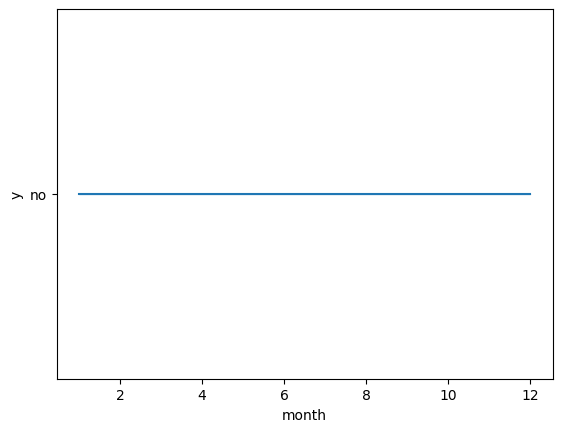

In [ ]:
#Evolución temporal de la tasa de conversión
sns.lineplot(data=df, x='month', y='y', estimator=lambda x: (x=='yes').mean())

In [56]:
#Correlación con la variable objetivo
df_numeric = df.select_dtypes(include='number')
df_numeric.corrwith(df['y'].apply(lambda x: 1 if x=='yes' else 0)).sort_values(ascending=False)

/Users/ainamartinezgomez/Desktop/EDA_Banco_Portugal/venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/ainamartinezgomez/Desktop/EDA_Banco_Portugal/venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


duration             0.4142
previous             0.2215
age_iterative        0.0291
housing              0.0118
quarter              0.0067
month                0.0043
year                 0.0027
dfavg_duration       0.0000
conversion_rate      0.0000
rejection_rate       0.0000
campaign_success    -0.0000
avg_contacts        -0.0000
loan                -0.0047
campaign            -0.0661
pdays                   NaN
default_iterative       NaN
avg_pdays               NaN
dtype: float64

In [60]:
df.to_csv('../Data/datos_metricas.csv', index=False)